# Imports and Helper functions


In [1]:
# Import libraries
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
plt.style.use('ggplot')

In [3]:
# Create enviornment
env = gym.make('Taxi-v3')

In [4]:
# check the states 
state_space = env.observation_space.n

In [5]:
# check action space
action_space = env.action_space.n

In [68]:
# define hyperparameters
num_episode = 1000
gamma = 0.95
learning_rate = 0.9

egreedy = 0.9
egreedy_min = 0.05
egreedy_decay = 0.999

egreedy_total = []

In [69]:
steps_total = []
total_reward = []

Q = torch.zeros([state_space, action_space])

for i_episode in range(num_episode):
    state = env.reset()
    step = 0
    score = 0
    
    while True:
        step += 1
        
        randon_egreedy = torch.rand(1).item()

        if randon_egreedy > egreedy:
            random_value = Q[state] + torch.rand(1, action_space) / 1000
            action = torch.max(random_value, 1)[1].item()
        else:
            action = env.action_space.sample()

        if egreedy > egreedy_min:
            egreedy *= egreedy_decay

        new_state, reward, done, info = env.step(action)

        Q[state][action] = (1 - learning_rate) * Q[state][action] + learning_rate * (reward +  gamma * torch.max(Q[new_state]))
        score += reward
        state = new_state

        #env.render()
        if done:
            steps_total.append(step)
            total_reward.append(score)
            #print('episode finished after %i steps' %step)
            break

In [70]:
print('Percent of episodes finished successfully : {0}'.format(sum(total_reward)/num_episode))
print('Percent of episodes finished successfully (last 100 episodes) : {0}'.format(sum(total_reward[-100:])/100))
print('Average number of steps: %.2f' % (sum(steps_total)/num_episode))
print('Average number of steps (last 100 episodes): %.2f' % (sum(steps_total[-100:])/100))

Percent of episodes finished successfully : -22.656
Percent of episodes finished successfully (last 100 episodes) : 4.15
Average number of steps: 30.36
Average number of steps (last 100 episodes): 14.24


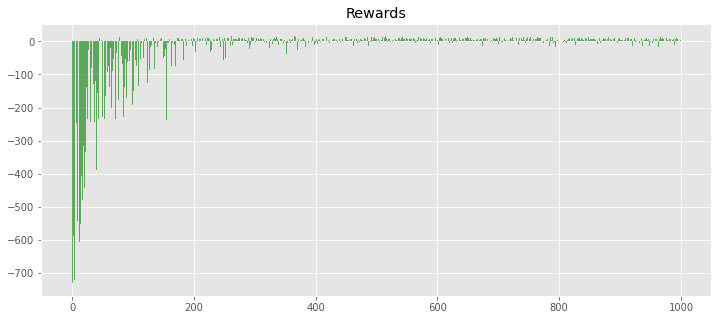

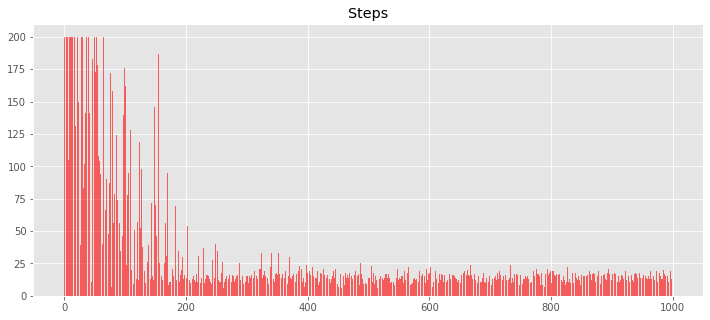

In [71]:
# Plot graphs for rewards and steps
plt.figure(figsize = (12, 5))
plt.title('Rewards')
plt.bar(torch.arange(len(total_reward)), total_reward, alpha = 0.6, color = 'green')
plt.show()

plt.figure(figsize = (12, 5))
plt.title('Steps')
plt.bar(torch.arange(len(steps_total)), steps_total, alpha = 0.6, color = 'red')
plt.show()